In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

import torch
from torch import nn
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import EMNIST
from torchvision import transforms

In [2]:
class CNN_EMnist(nn.Module):
    def __init__(self, input_channel):
        super(CNN_EMnist, self).__init__()

        self.dw1 = nn.Sequential(
            nn.Conv2d(input_channel, 32, kernel_size=5),
            nn.ReLU(),
        )

        self.dw2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5),
            nn.ReLU(),            
        )

        self.up1 = nn.Sequential(
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=5) 
        )

        self.up2 = nn.Sequential(            
            nn.ReLU(),
            nn.ConvTranspose2d(32, input_channel, kernel_size=5) 
        )

        self.act = nn.Sigmoid()


    def forward(self, x):
        x = self.dw1(x)
        x= self.dw2(x)
        x = self.up1(x)
        x = self.up2(x)
        x = self.act(x)
        return x

In [4]:
transform = transforms.Compose(
    [
        transforms.ToTensor(), 
        transforms.Normalize((0.1307,), (0.3081,))
    ]
)

trainset = EMNIST(root='~/data', split = "byclass", train=True, download=True, transform=transform)
train_dl = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)
testset = EMNIST(root='~/data', split = "byclass", train=False, download=True, transform=transform)
test_dl = DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

print(len(train_dl), len(test_dl))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 561753746/561753746 [02:50<00:00, 3293921.99it/s]


Extracting /home/khoidh/data/EMNIST/raw/gzip.zip to /home/khoidh/data/EMNIST/raw
21811 3636


In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu", index = 0)

model = CNN_EMnist(input_channel=1).to(device)

optimizer = Adam(model.parameters(), lr = 0.0001)

loss_fn = nn.MSELoss()

In [6]:
for epoch in range(10):
    model.train()
    tr_total_loss = 0
    for train_img, _ in tqdm(train_dl):
        train_img = train_img.to(device)

        gen_img = model(train_img)
        train_loss = loss_fn(gen_img, train_img)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        tr_total_loss += train_loss.item()

    model.eval()
    with torch.no_grad():
        va_total_loss = 0
        for valid_img, _ in tqdm(test_dl):
            valid_img = valid_img.to(device)

            gen_img = model(valid_img)

            valid_loss = loss_fn(gen_img, valid_img)

            va_total_loss += valid_loss.item()

    print(f"Epoch: {epoch} - TrainLoss: {tr_total_loss/len(train_dl)} - ValidLoss: {va_total_loss/len(test_dl)}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:29<00:00, 123.75it/s]


Epoch: 0 - TrainLoss: 0.5006139710040659 - ValidLoss: 0.4985892500306251


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:29<00:00, 123.40it/s]


Epoch: 1 - TrainLoss: 0.49837238204828466 - ValidLoss: 0.49832384600596064


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:31<00:00, 114.93it/s]


Epoch: 2 - TrainLoss: 0.4982742376922386 - ValidLoss: 0.4982979753115127


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:32<00:00, 112.43it/s]


Epoch: 3 - TrainLoss: 0.49825662408792837 - ValidLoss: 0.49827732399056845


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:29<00:00, 123.11it/s]


Epoch: 4 - TrainLoss: 0.4982435568770201 - ValidLoss: 0.4982682653222278


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:31<00:00, 113.66it/s]


Epoch: 5 - TrainLoss: 0.49823897708769127 - ValidLoss: 0.4982695504777109


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:32<00:00, 112.80it/s]


Epoch: 6 - TrainLoss: 0.4982319228721066 - ValidLoss: 0.4982621284289853


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:29<00:00, 122.91it/s]


Epoch: 7 - TrainLoss: 0.4982295356665947 - ValidLoss: 0.49825647317602556


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:29<00:00, 123.45it/s]


Epoch: 8 - TrainLoss: 0.4982247817172543 - ValidLoss: 0.4982547413217615


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3636/3636 [00:29<00:00, 122.37it/s]

Epoch: 9 - TrainLoss: 0.4982234893054047 - ValidLoss: 0.49825872708730834


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  9.68it/s]


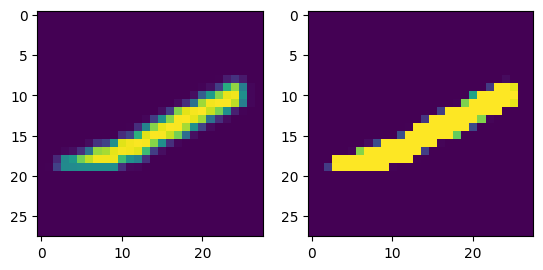

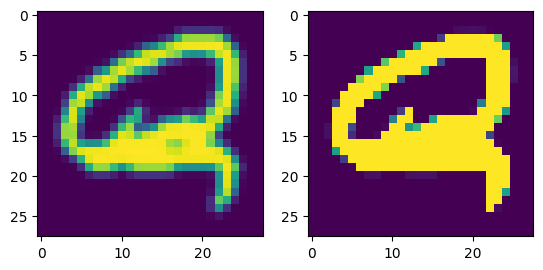

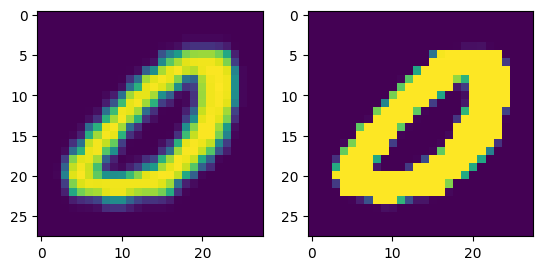

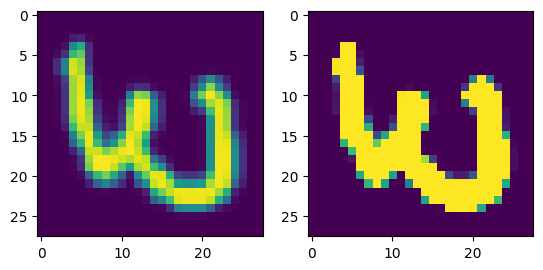

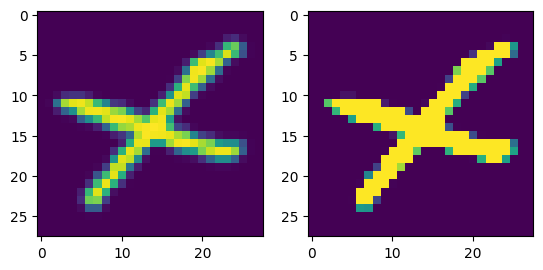

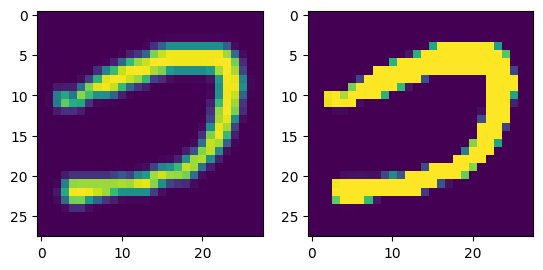

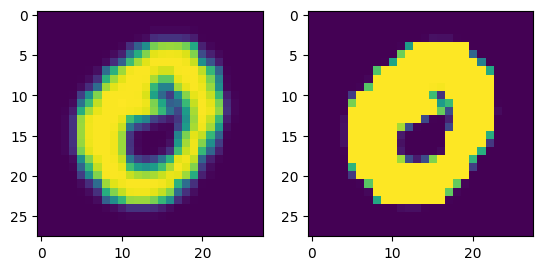

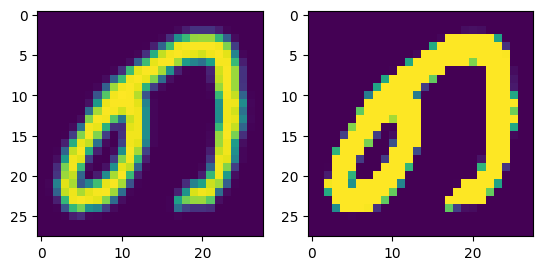

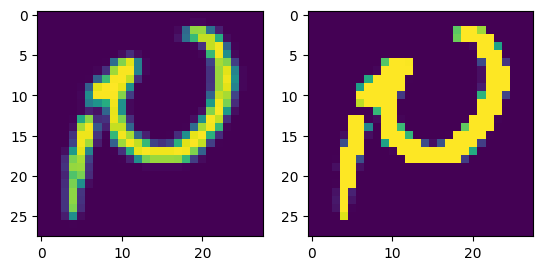

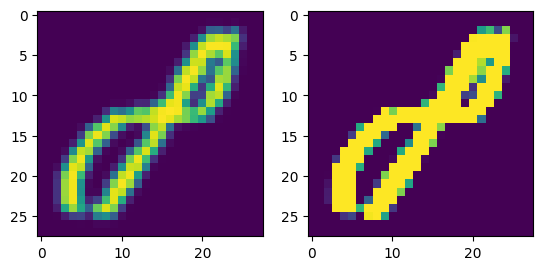

In [7]:
model.eval()
with torch.no_grad():
    for test_case_idx in tqdm(range(10)):
        valid_img, _ = testset[test_case_idx]
        valid_img = valid_img.unsqueeze(dim=0).to(device)

        gen_img = model(valid_img)        

        f, axarr = plt.subplots(1, 2)
        axarr[0].imshow(valid_img[0].cpu().permute(1, -1, 0).numpy())
        axarr[1].imshow(gen_img[0].cpu().permute(1, -1, 0).numpy())